<a href="https://colab.research.google.com/github/eugeniaring/machine-learning-course-eugenia/blob/main/8_preprocessing_ifoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('bank-dataset.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1,-1,0,unknown,no


In [ ]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['y'].value_counts()

no     39925
yes     3172
Name: y, dtype: int64

In [ ]:
df.shape

(43097, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43097 entries, 0 to 43096
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43074 non-null  float64
 1   job        43097 non-null  object 
 2   marital    43097 non-null  object 
 3   education  43097 non-null  object 
 4   default    43097 non-null  object 
 5   balance    43097 non-null  int64  
 6   housing    43097 non-null  object 
 7   loan       43097 non-null  object 
 8   contact    43039 non-null  object 
 9   day        43097 non-null  int64  
 10  month      43097 non-null  object 
 11  duration   43021 non-null  float64
 12  campaign   43097 non-null  int64  
 13  pdays      43097 non-null  int64  
 14  previous   43097 non-null  int64  
 15  poutcome   43087 non-null  object 
 16  y          43097 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 5.6+ MB


In [ ]:
df.isnull().sum()

age          23
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact      58
day           0
month         0
duration     76
campaign      0
pdays         0
previous      0
poutcome     10
y             0
dtype: int64

In [ ]:
df.duplicated().sum()

8

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,43074.000000,43097.000000,43097.000000,43021.000000,43097.000000,43097.000000,43097.000000
mean,41.297674,1342.323596,15.858157,244.533251,2.796622,38.725155,0.550154
std,12.240857,2990.087062,8.429079,239.982705,3.144191,98.700477,2.280486
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,67.000000,8.000000,100.000000,1.000000,-1.000000,0.000000
50%,39.000000,437.000000,16.000000,174.000000,2.000000,-1.000000,0.000000
75%,48.000000,1400.000000,21.000000,303.000000,3.000000,-1.000000,0.000000
max,150.000000,102127.000000,99.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df[df['balance']==-8019.000000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12691,26.0,blue-collar,single,secondary,yes,-8019,no,yes,cellular,7,jul,299.0,3,-1,0,unknown,no


In [ ]:
df[df['balance']<0].job.unique()

array(['admin.', 'management', 'blue-collar', 'technician',
       'self-employed', 'entrepreneur', 'services', 'retired',
       'unemployed', 'student', 'housemaid', 'unknown'], dtype=object)

In [ ]:
df.isnull().sum()/len(df)*100

age          0.053368
job          0.000000
marital      0.000000
education    0.000000
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.134580
day          0.000000
month        0.000000
duration     0.176346
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.023203
y            0.000000
dtype: float64

<Axes: >

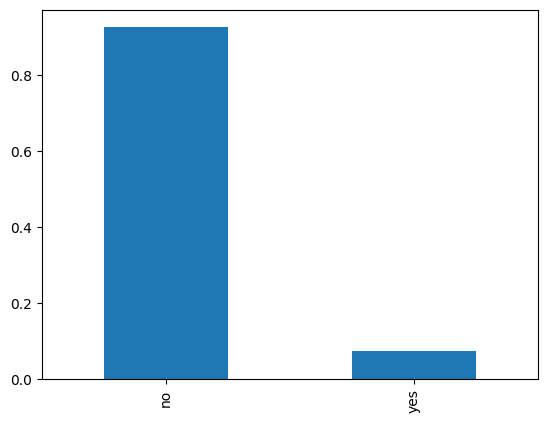

In [ ]:
df['y'].value_counts(normalize=True).plot.bar()

## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43097 entries, 0 to 43096
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43074 non-null  float64
 1   job        43097 non-null  object 
 2   marital    43097 non-null  object 
 3   education  43097 non-null  object 
 4   default    43097 non-null  object 
 5   balance    43097 non-null  int64  
 6   housing    43097 non-null  object 
 7   loan       43097 non-null  object 
 8   contact    43039 non-null  object 
 9   day        43097 non-null  int64  
 10  month      43097 non-null  object 
 11  duration   43021 non-null  float64
 12  campaign   43097 non-null  int64  
 13  pdays      43097 non-null  int64  
 14  previous   43097 non-null  int64  
 15  poutcome   43087 non-null  object 
 16  y          43097 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 5.6+ MB


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
num_features = list(df.columns[(df.dtypes!='object')])
num_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
df.drop(columns=['y'],axis=1).columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [ ]:
cat_features = list(df.drop(columns=['y'],axis=1).columns[df.drop(columns=['y'],axis=1).dtypes=='object'])
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
len(num_features)

7

In [ ]:
import seaborn as sns

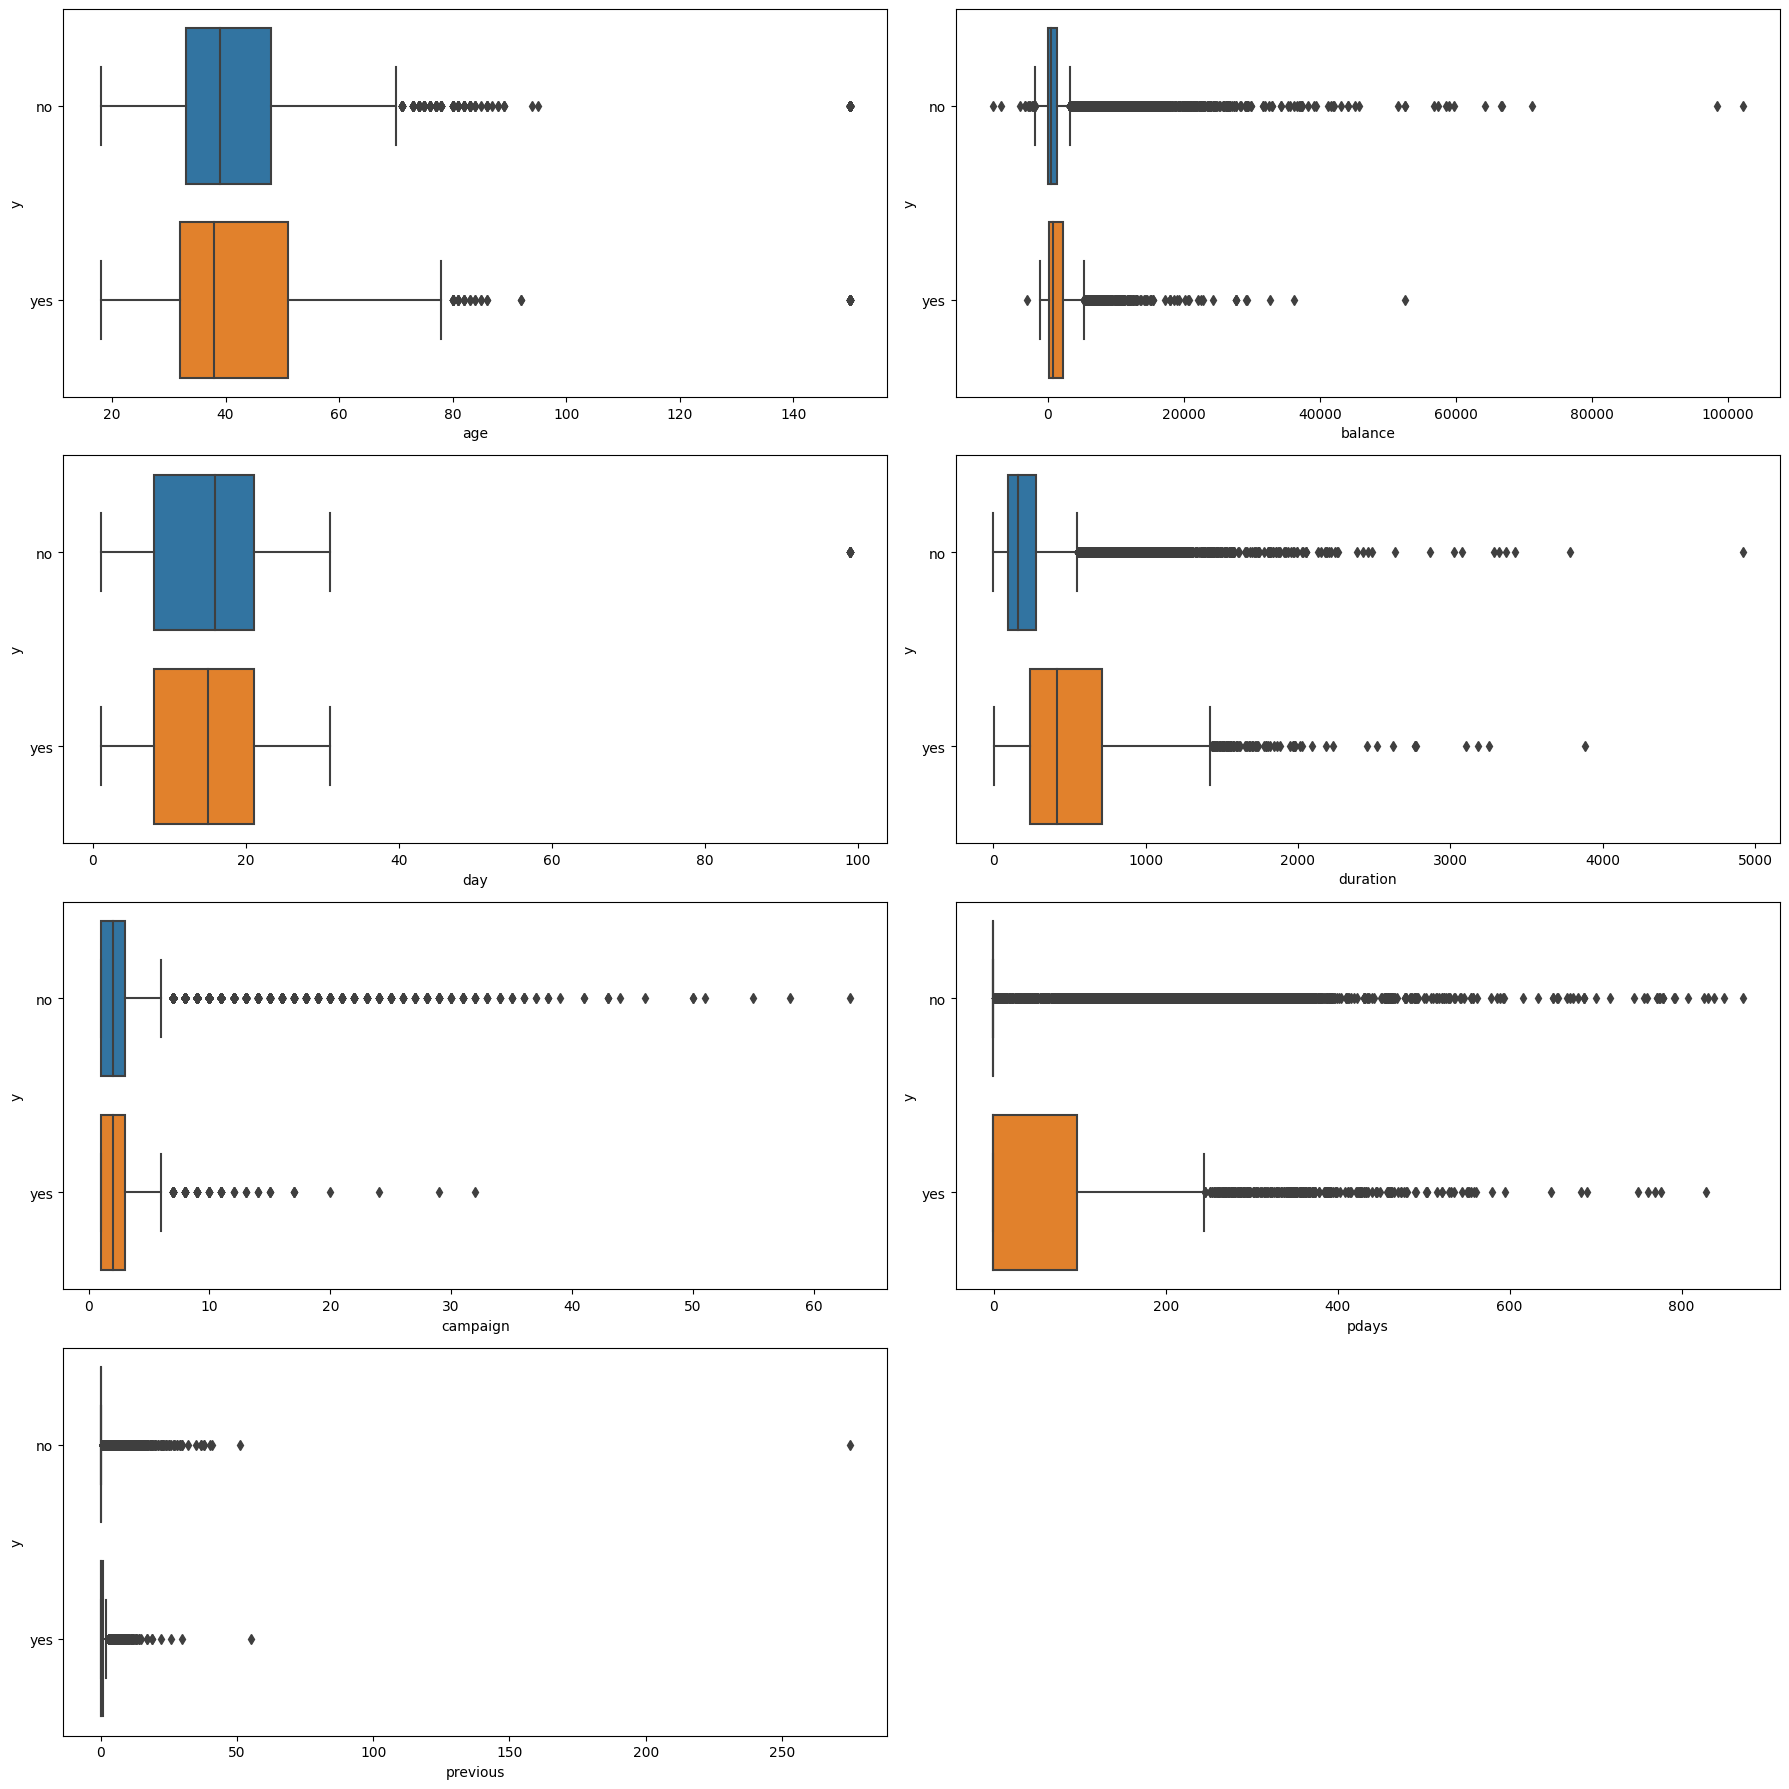

In [ ]:
plt.figure(figsize=(18,18))
for i, col in enumerate(num_features):
  ax = plt.subplot(4,2,i+1)
  sns.boxplot(data=df,x=col,y='y',ax=ax)
plt.tight_layout()

In [ ]:
df[df.age>140].age.describe()

count    157.0
mean     150.0
std        0.0
min      150.0
25%      150.0
50%      150.0
75%      150.0
max      150.0
Name: age, dtype: float64

In [ ]:
df = df[df.age!=150.0]

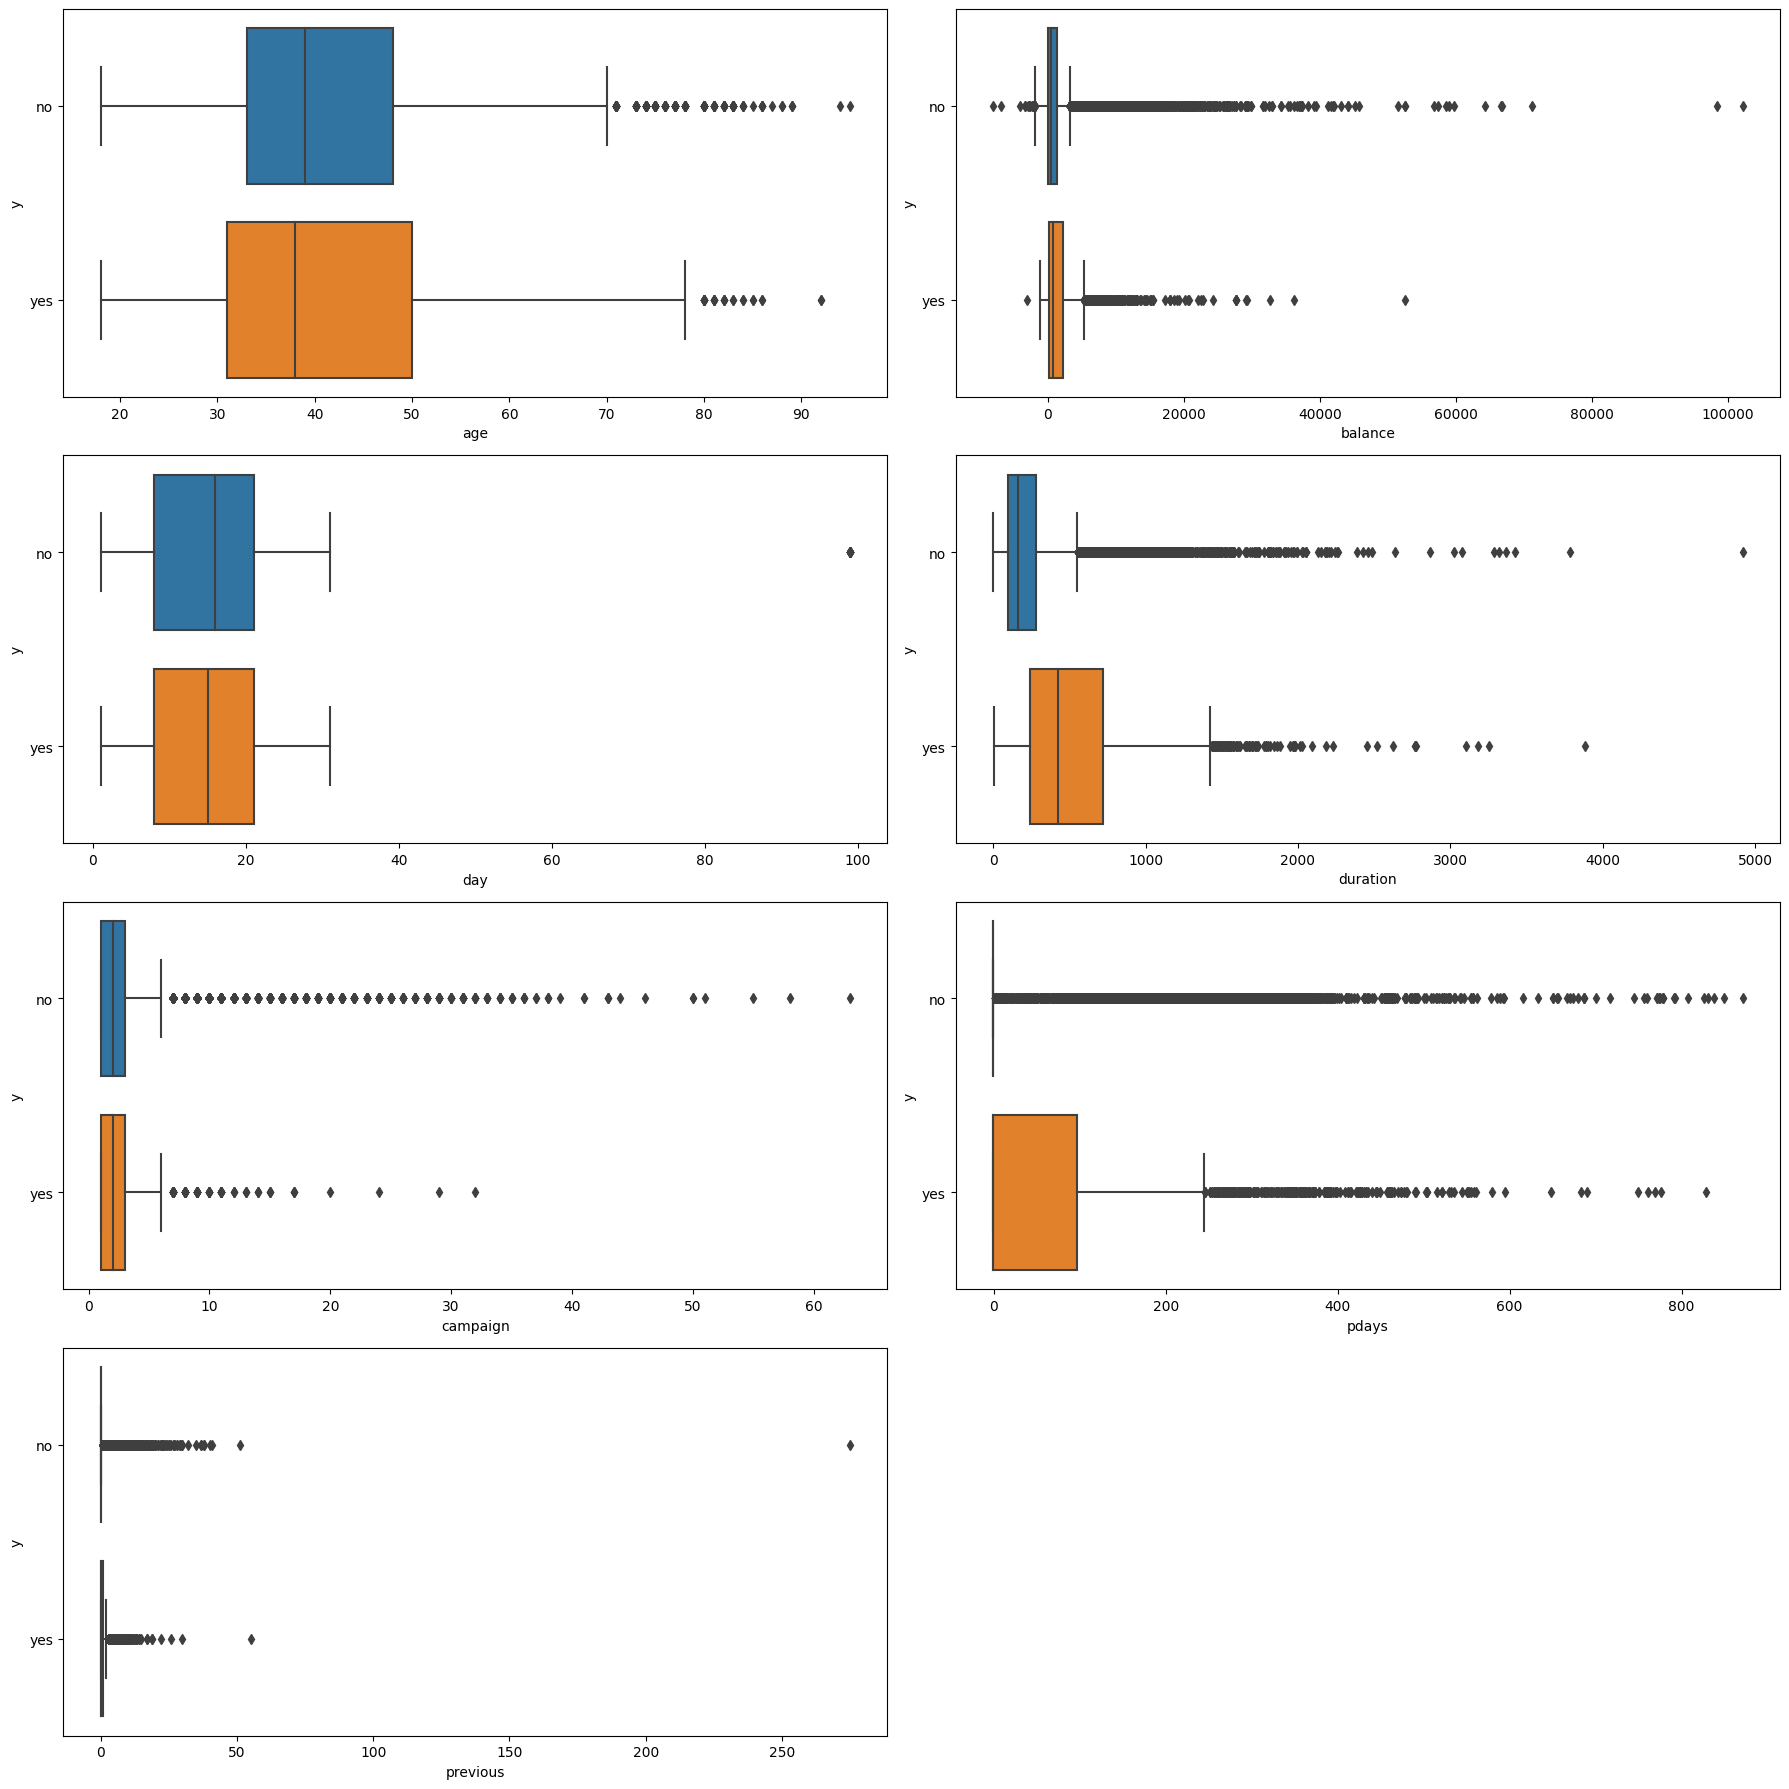

In [ ]:
plt.figure(figsize=(18,18))
for i, col in enumerate(num_features):
  ax = plt.subplot(4,2,i+1)
  sns.boxplot(data=df,x=col,y='y',ax=ax)
plt.tight_layout()

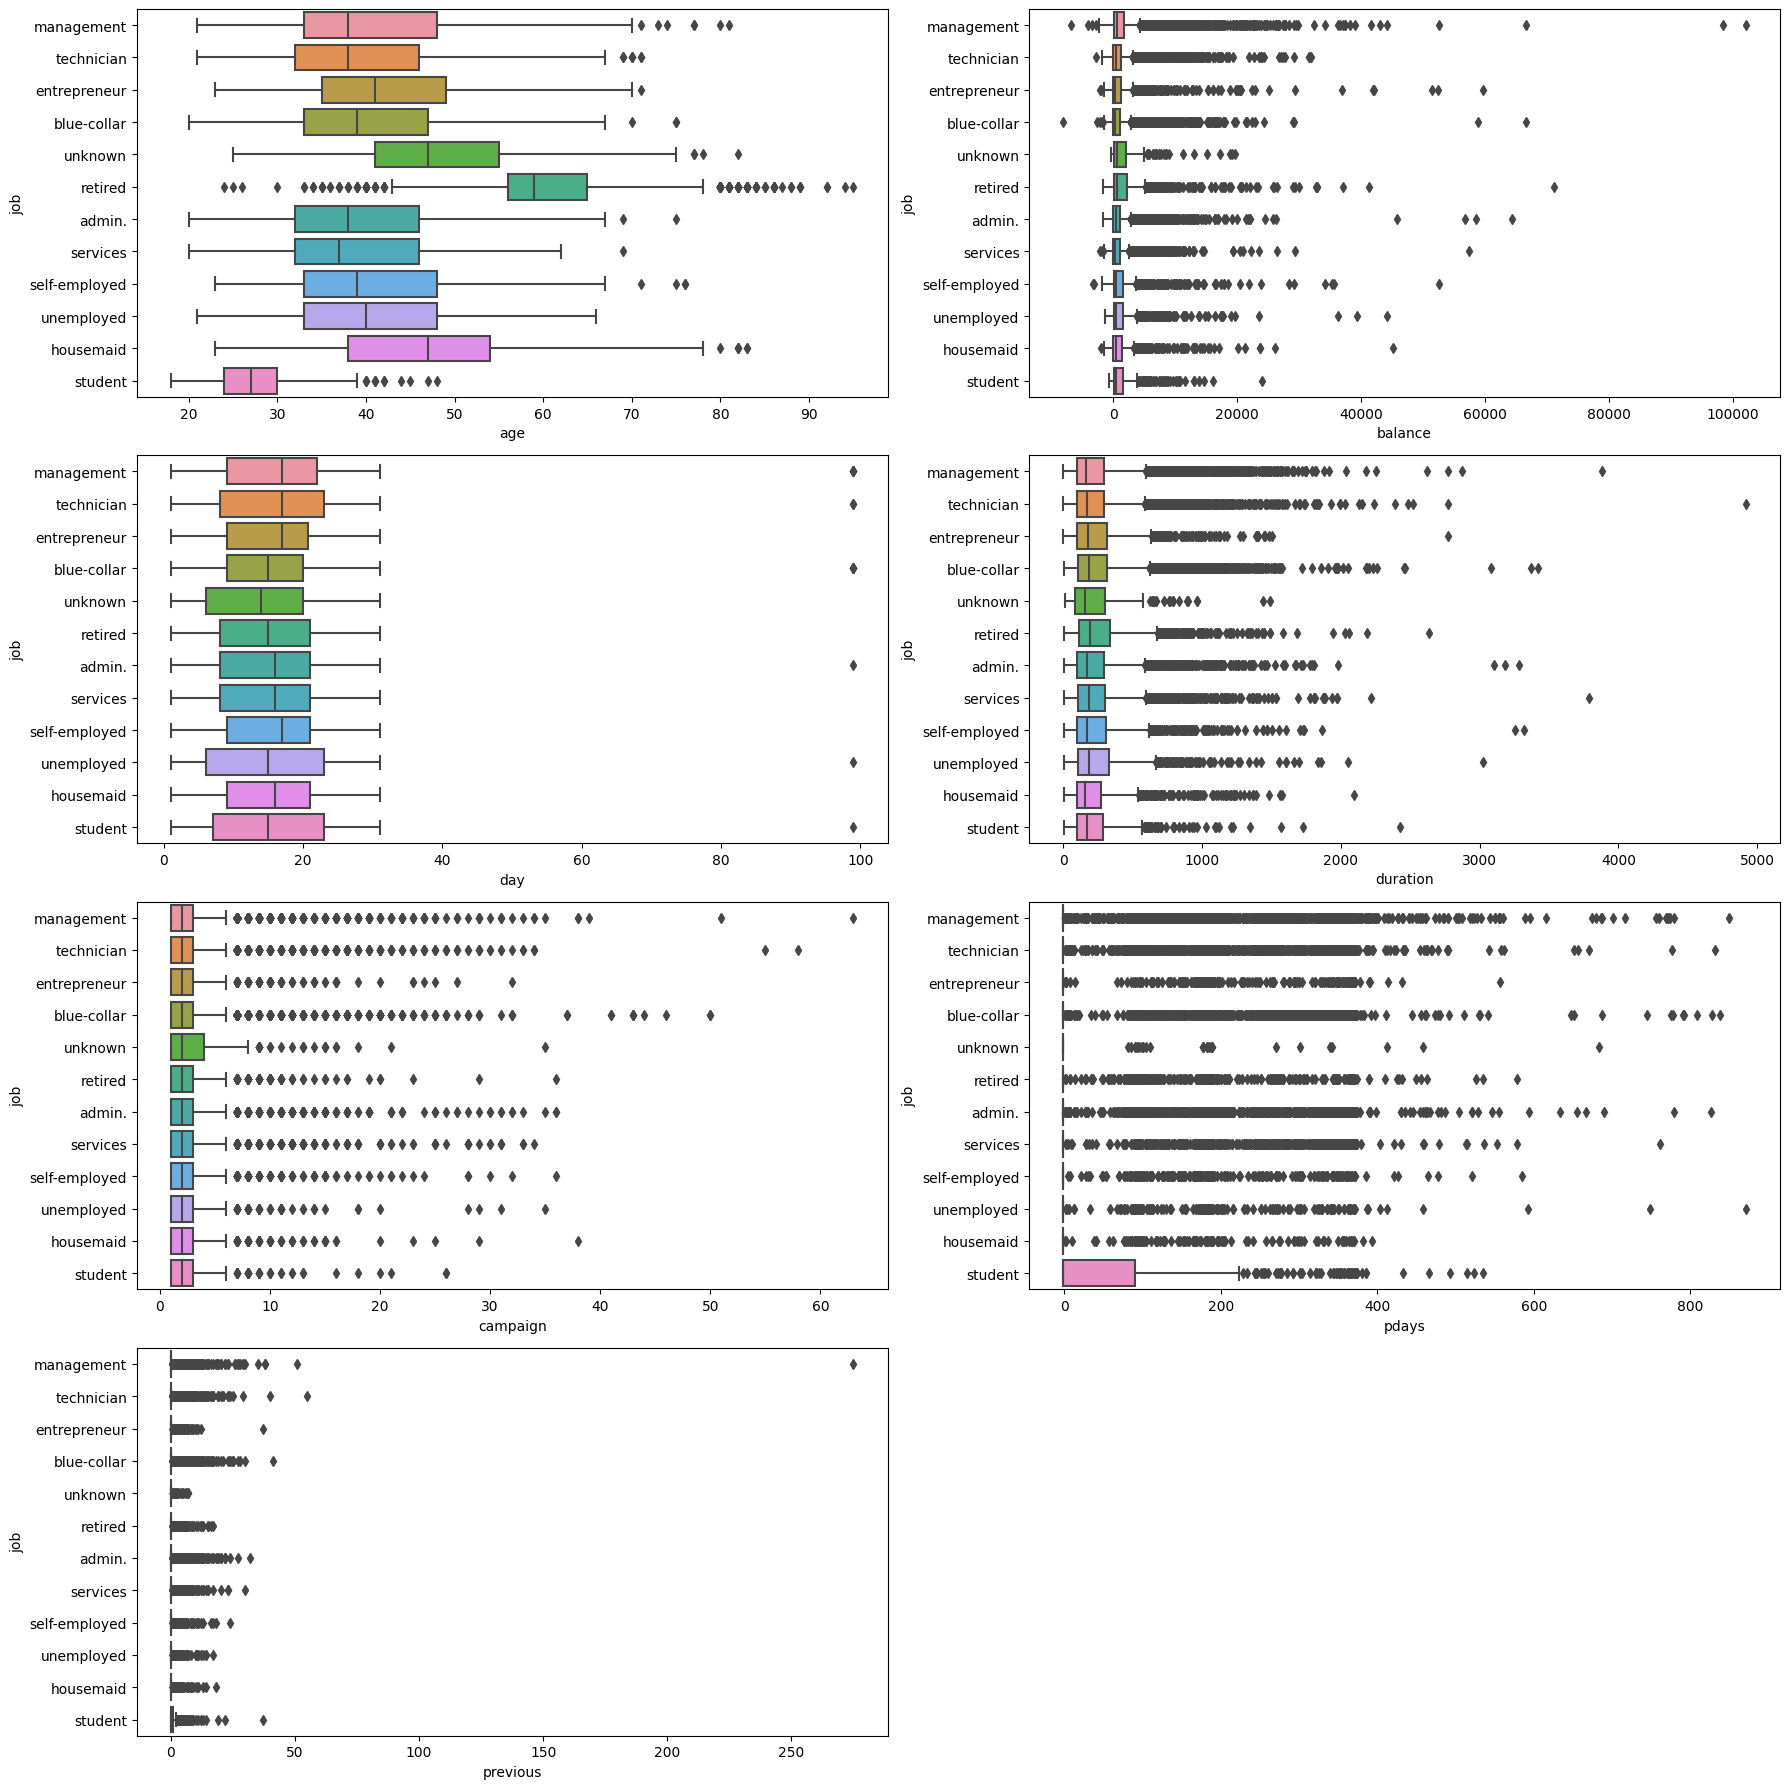

In [ ]:
plt.figure(figsize=(18,18))
for i, col in enumerate(num_features):
  ax = plt.subplot(4,2,i+1)
  sns.boxplot(data=df,x=col,y='job',ax=ax)
plt.tight_layout()

In [ ]:
len(cat_features)

9

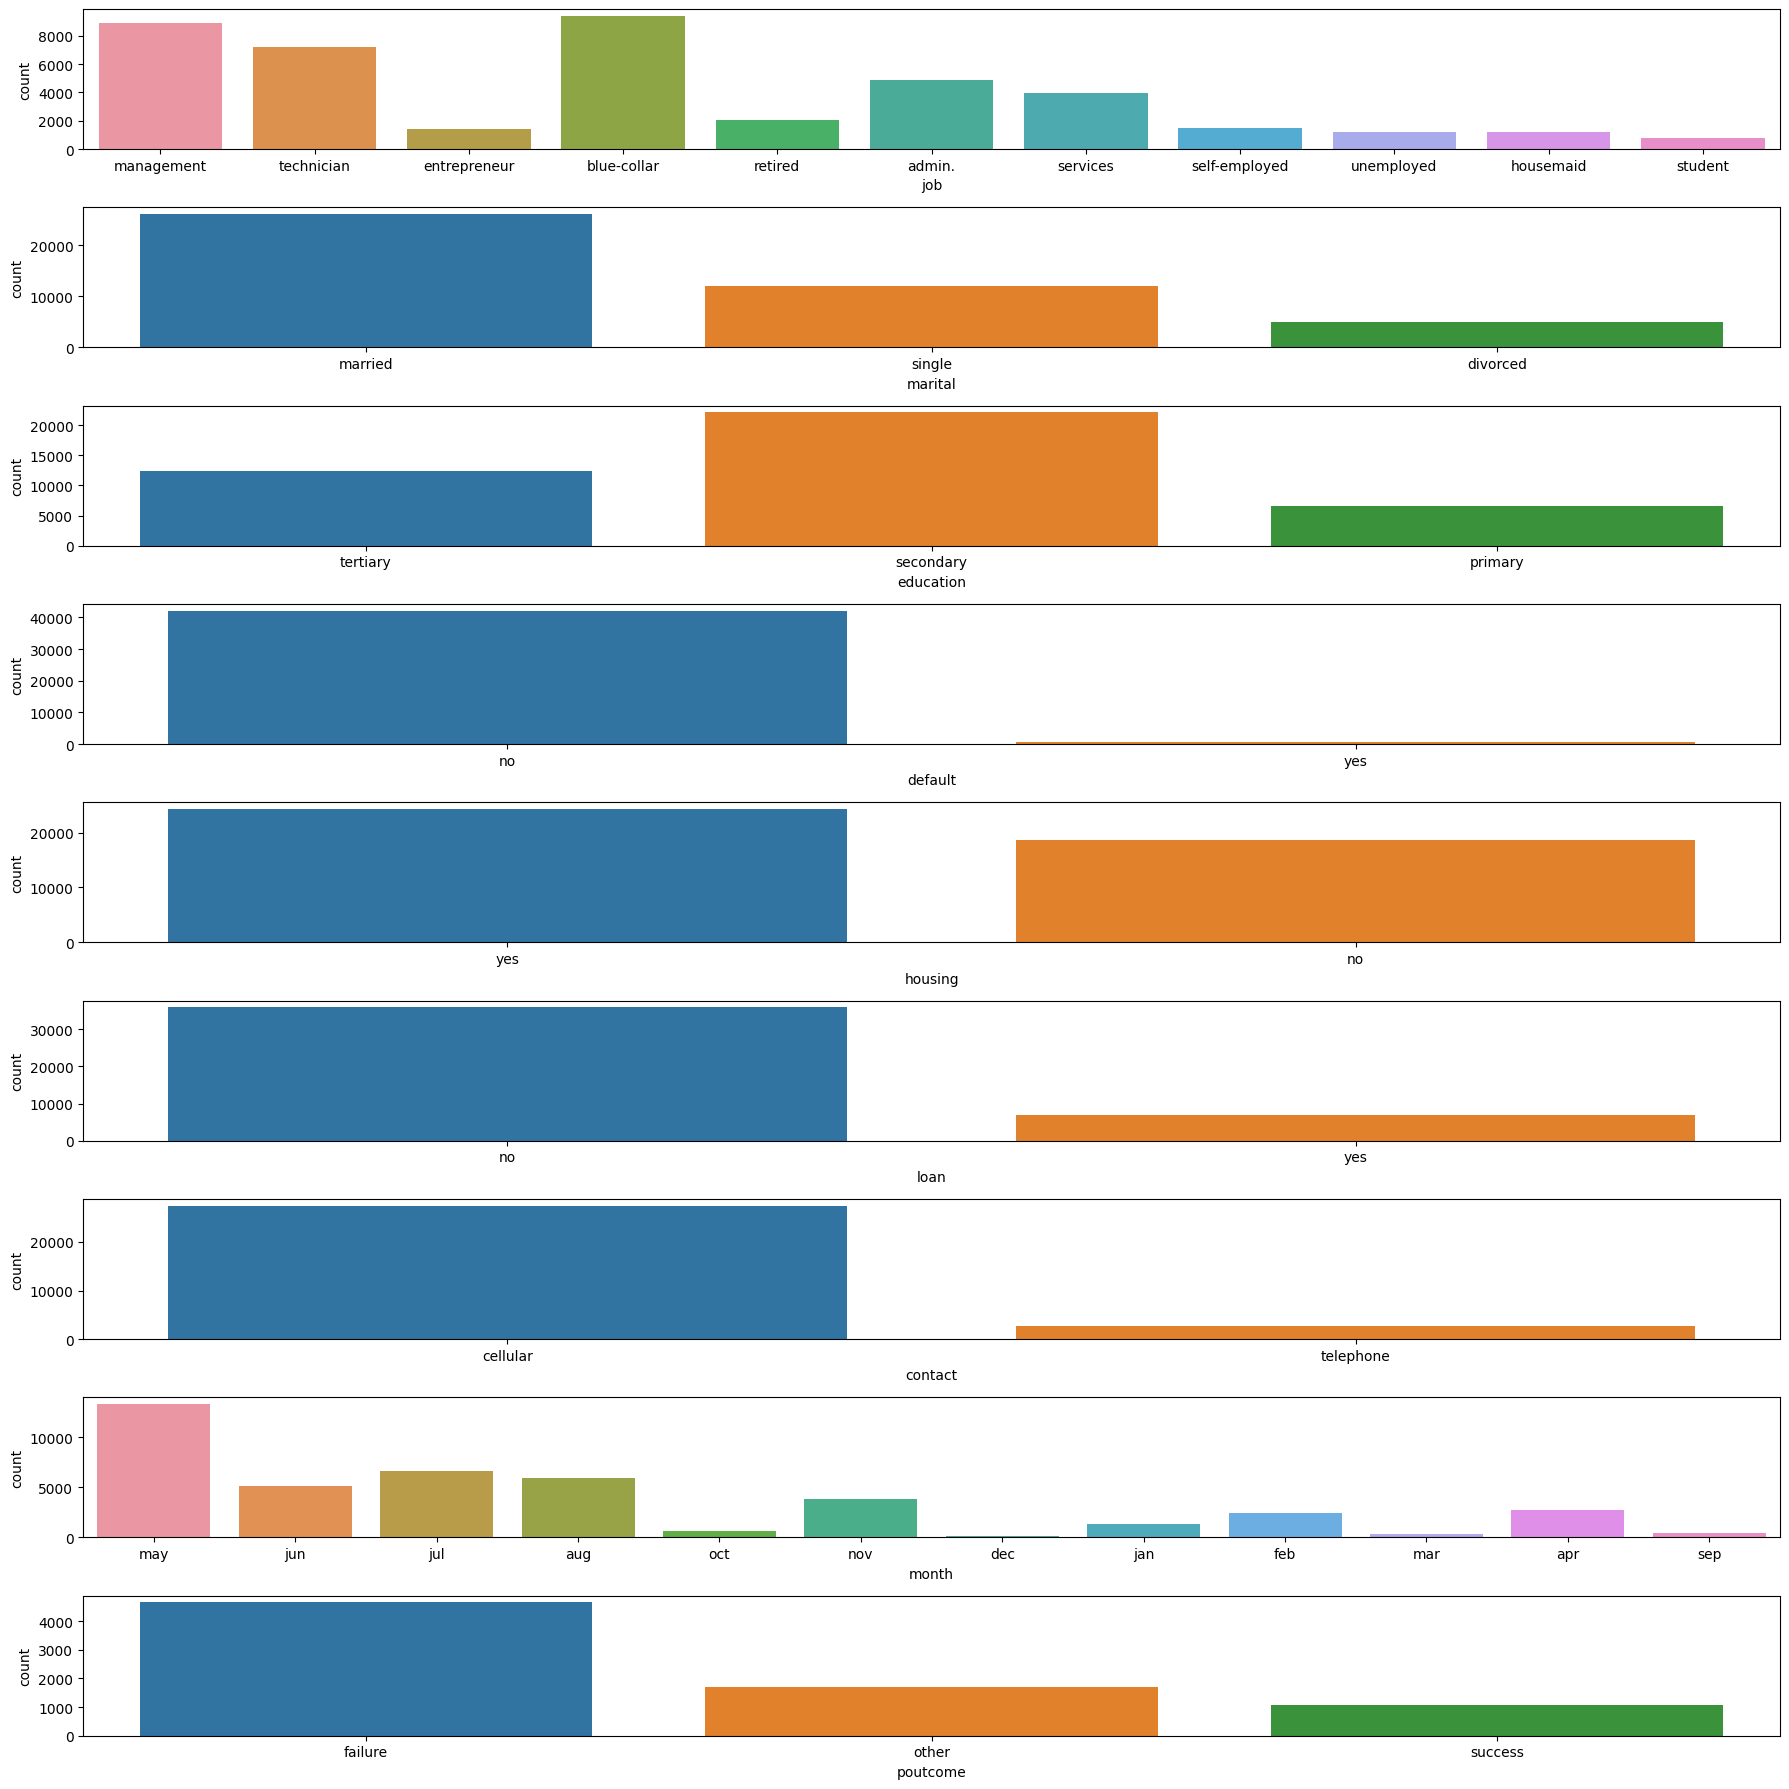

In [ ]:
plt.figure(figsize=(18,18))
for i, col in enumerate(cat_features):
  ax = plt.subplot(9,1,i+1)
  sns.countplot(data=df,x=col,ax=ax)
plt.tight_layout()

In [ ]:
df.marital.value_counts()

married     26062
single      11773
divorced     4937
Singl         100
S              39
divrcd         28
Single          1
Name: marital, dtype: int64

In [ ]:
df['marital'] = df['marital'].str.lower()

In [ ]:
df.marital.value_counts()

married     26062
single      11774
divorced     4937
singl         100
s              39
divrcd         28
Name: marital, dtype: int64

In [ ]:
diz = {'singl':'single','s':'single','divrcd':'divorced'}

df['marital'] = df['marital'].map(lambda x: x if x not in diz.keys() else diz[x])
df.marital.value_counts()

married     26062
single      11913
divorced     4965
Name: marital, dtype: int64

In [ ]:
import numpy as np

In [ ]:
df.job.isnull().sum()

0

In [ ]:
df.loc[df.job=='unknown','job'] = np.nan

In [ ]:
df.job.isnull().sum()

278

In [ ]:
df.loc[df.contact=='unknown','contact'] = np.nan
df.loc[df.education=='unknown','education'] = np.nan
df.loc[df.poutcome=='unknown','poutcome'] = np.nan

In [ ]:
df_missings = (df.isnull().sum()/len(df)*100).reset_index()

In [ ]:
df_missings.columns = ['index','count']

In [ ]:
df_missings.sort_values(by='count',ascending=False)

,index,count
8,contact,29.676293
3,education,4.052166
1,job,0.647415
11,duration,0.176991
0,age,0.053563
2,marital,0.000000
4,default,0.000000
5,balance,0.000000
6,housing,0.000000
7,loan,0.000000


In [ ]:
df.drop(columns=['poutcome'],axis=1,inplace=True)

In [ ]:
num_features = list(df.columns[(df.dtypes!='object')])

In [ ]:
df[num_features].corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.093099,-0.010445,-0.008413,0.004796,-0.029846,-0.005232
balance,0.093099,1.000000,0.006691,0.020833,-0.014294,0.000816,0.014683
day,-0.010445,0.006691,1.000000,-0.033217,0.162093,-0.094380,-0.051646
duration,-0.008413,0.020833,-0.033217,1.000000,-0.086689,-0.004078,-0.002126
campaign,0.004796,-0.014294,0.162093,-0.086689,1.000000,-0.086908,-0.029987
pdays,-0.029846,0.000816,-0.094380,-0.004078,-0.086908,1.000000,0.454931
previous,-0.005232,0.014683,-0.051646,-0.002126,-0.029987,0.454931,1.000000


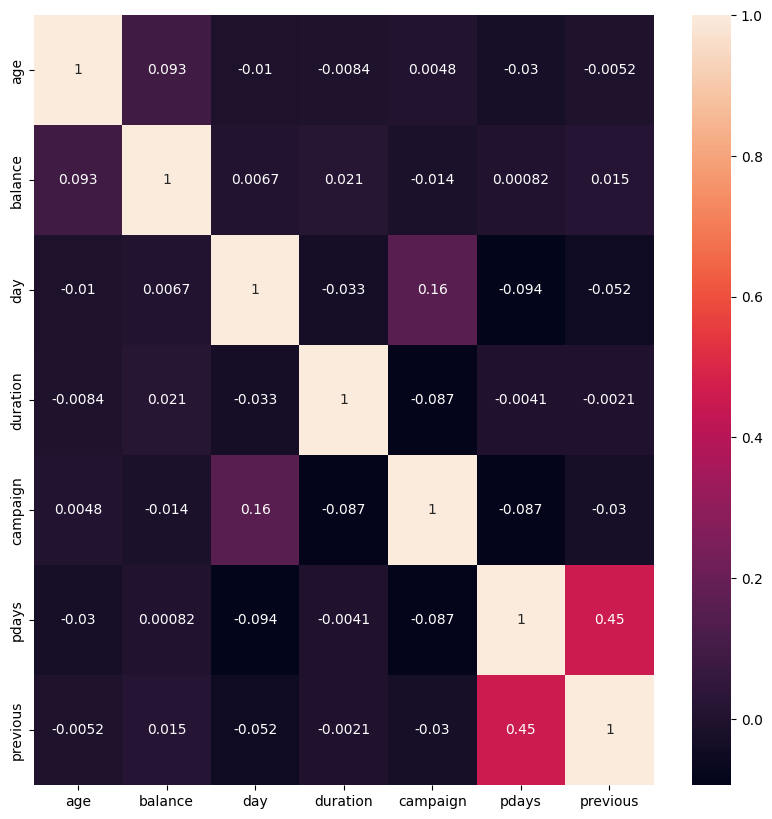

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num_features].corr(),annot=True)
plt.show()

In [ ]:
df[df.pdays==-1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58.0,management,married,tertiary,no,2143,yes,no,NaN,5,may,261.0,1,-1,0,no
1,44.0,technician,single,secondary,no,29,yes,no,NaN,5,may,151.0,1,-1,0,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76.0,1,-1,0,no
3,47.0,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92.0,1,-1,0,no
4,33.0,NaN,single,NaN,no,1,no,no,NaN,5,may,198.0,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43091,34.0,admin.,single,secondary,no,557,no,no,cellular,17,nov,224.0,1,-1,0,yes
43092,25.0,technician,single,secondary,no,505,no,yes,cellular,17,nov,386.0,2,-1,0,yes
43093,51.0,technician,married,tertiary,no,825,no,no,cellular,17,nov,977.0,3,-1,0,yes
43094,71.0,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456.0,2,-1,0,yes


In [ ]:
len(df[df.pdays!=-1])

7457

In [ ]:
df['pdays_cat'] = df['pdays'].apply(lambda x: 0 if x==-1 else 1)

In [ ]:
df['pdays_cat'].value_counts()

0    35483
1     7457
Name: pdays_cat, dtype: int64

## Gestire valori mancanti - media/moda/median

In [ ]:
df_missings.sort_values(by='count',ascending=False)

,index,count
8,contact,29.676293
3,education,4.052166
1,job,0.647415
11,duration,0.176991
0,age,0.053563
2,marital,0.000000
4,default,0.000000
5,balance,0.000000
6,housing,0.000000
7,loan,0.000000


In [ ]:
df.duplicated().sum()

8

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())

In [ ]:
df['age'].isnull().sum()

0

In [ ]:
df['duration'] = df['duration'].fillna(df['duration'].mean())

In [ ]:
df['duration'].isnull().sum()

0

In [ ]:
for c in ['contact','job','education']:
  df[c] = df[c].fillna(df[c].mode()[0])

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
pdays_cat    0
dtype: int64

## gestire variabili categoriche

In [ ]:
df.y.value_counts()

0    39800
1     3132
Name: y, dtype: int64

In [ ]:
df['y'] = df['y'].apply(lambda x: 0 if x=='no' else 1)

In [ ]:
cat_features = ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month']

In [ ]:
for c in cat_features:
   print(df[c].value_counts())
   print('\n')

blue-collar      9711
management       8932
technician       7243
admin.           4915
services         3979
retired          2031
self-employed    1509
entrepreneur     1430
unemployed       1210
housemaid        1191
student           781
Name: job, dtype: int64


married     26062
single      11905
divorced     4965
Name: marital, dtype: int64


secondary    23874
tertiary     12476
primary       6582
Name: education, dtype: int64


0    42133
1      799
Name: default, dtype: int64


1    24280
0    18652
Name: housing, dtype: int64


0    35886
1     7046
Name: loan, dtype: int64


cellular     40209
telephone     2723
Name: contact, dtype: int64


8     13336
5      6640
1      5973
6      5089
9      3808
0      2689
3      2457
4      1346
10      602
11      467
7       366
2       159
Name: month, dtype: int64




no     42133
yes      799
Name: default, dtype: int64


yes    24280
no     18652
Name: housing, dtype: int64


no     35886
yes     7046
Name: loan, dtype: int64

In [ ]:
for c in ['default','housing','loan']:
   df[c] = df[c].apply(lambda x: 0 if x=='no' else 1)

In [ ]:
dummy_variables = pd.get_dummies(df[['job','marital','education','contact']]).columns.tolist()

In [ ]:
df[dummy_variables] = pd.get_dummies(df[['job','marital','education','contact']])

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'pdays_cat', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_cellular', 'contact_telephone'],
      dtype='object')

In [ ]:
df['month'].value_counts()

8     13336
5      6640
1      5973
6      5089
9      3808
0      2689
3      2457
4      1346
10      602
11      467
7       366
2       159
Name: month, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
df['month'] = encoder.fit_transform(df['month'])

In [ ]:
df[num_features].describe()

,age,balance,day,duration,campaign,pdays,previous
count,42932.000000,42932.000000,42932.000000,42932.000000,42932.000000,42932.000000,42932.000000
mean,40.902561,1341.531119,15.860570,244.551615,2.798821,38.715667,0.549264
std,10.340642,2992.180951,8.428862,239.902547,3.147805,98.728388,2.281145
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,67.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,437.000000,16.000000,174.000000,2.000000,-1.000000,0.000000
75%,48.000000,1398.000000,21.000000,303.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,99.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.drop(columns=['pdays'],axis=1,inplace=True)

In [ ]:
df.y.value_counts()

0    39800
1     3132
Name: y, dtype: int64

In [ ]:
df.y.value_counts()/len(df)*100

0    92.704742
1     7.295258
Name: y, dtype: float64

In [ ]:
df0 = df[df.y==0]
df1 = df[df.y==1]

In [ ]:
df0 = df0.sample(n=3132)

In [ ]:
df_bil = pd.concat([df0,df1],ignore_index=False)

In [ ]:
df.y.value_counts()/len(df)*100

0    92.704742
1     7.295258
Name: y, dtype: float64

In [ ]:
df_bil.y.value_counts()/len(df_bil)*100

0    50.0
1    50.0
Name: y, dtype: float64

## dividere dataset in training e test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'y', 'pdays_cat', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_telephone'],
      dtype='object')

In [ ]:
X = df_bil.drop(['job', 'marital', 'education','y','contact','month'],axis=1)

In [ ]:
y = df_bil['y']

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [ ]:
len(X_train)

5011

In [ ]:
len(X_test)

1253

## Modello di Machine Learning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print(accuracy_score(y_pred_train,y_train))
print(accuracy_score(y_pred_test,y_test))

1.0
0.7541899441340782


In [ ]:
rf = RandomForestClassifier(min_samples_split=30)
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=30)

In [ ]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print(accuracy_score(y_pred_train,y_train))
print(accuracy_score(y_pred_test,y_test))

0.8724805428058272
0.8332003192338387


In [ ]:
feature_names = rf.feature_names_in_
importances = rf.feature_importances_
indices = np.argsort(importances)

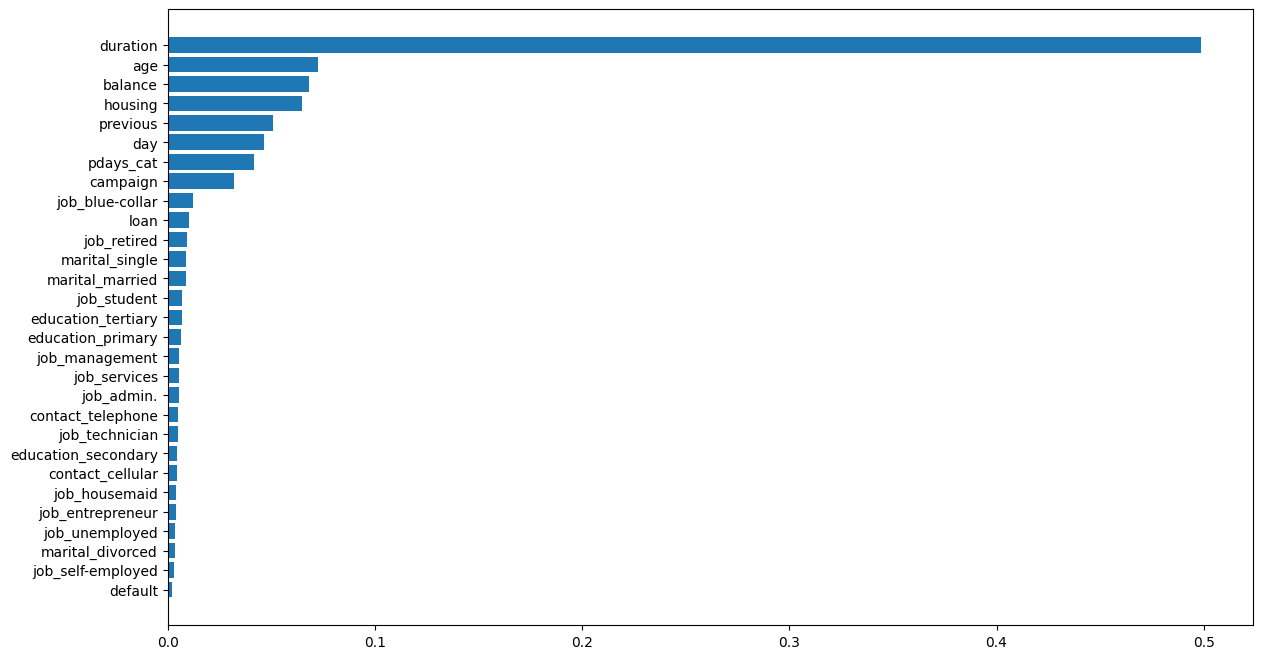

In [ ]:
plt.figure(figsize=(14,8))
plt.barh(range(len(indices)),importances[indices],align='center')
plt.yticks(range(len(indices)),feature_names[indices])
plt.show()


## feature selection with RFE

In [ ]:
from sklearn.feature_selection import RFE,SelectKBest,f_classif

In [ ]:
rfe = RFE(RandomForestClassifier(min_samples_split=30,random_state=123),n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(min_samples_split=30, random_state=123),
    n_features_to_select=15)

In [ ]:
len(rfe.feature_names_in_)

29

In [ ]:
rfe.feature_names_in_[rfe.support_]

array(['age', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign',
       'previous', 'pdays_cat', 'job_blue-collar', 'job_retired',
       'job_student', 'marital_married', 'marital_single',
       'education_tertiary'], dtype=object)

In [ ]:
rfe.support_

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False,  True, False, False,
        True, False, False, False,  True,  True, False, False,  True,
       False, False])

In [ ]:
rfe_features = list(rfe.feature_names_in_[rfe.support_])
rfe_features

['age',
 'balance',
 'housing',
 'loan',
 'day',
 'duration',
 'campaign',
 'previous',
 'pdays_cat',
 'job_blue-collar',
 'job_retired',
 'job_student',
 'marital_married',
 'marital_single',
 'education_tertiary']

In [ ]:
rf = RandomForestClassifier(min_samples_split=30)
rf.fit(X_train[rfe_features],y_train)

RandomForestClassifier(min_samples_split=30)

In [ ]:
y_pred_train = rf.predict(X_train[rfe_features])
y_pred_test = rf.predict(X_test[rfe_features])
print(accuracy_score(y_pred_train,y_train))
print(accuracy_score(y_pred_test,y_test))

0.8627020554779485
0.8276137270550679


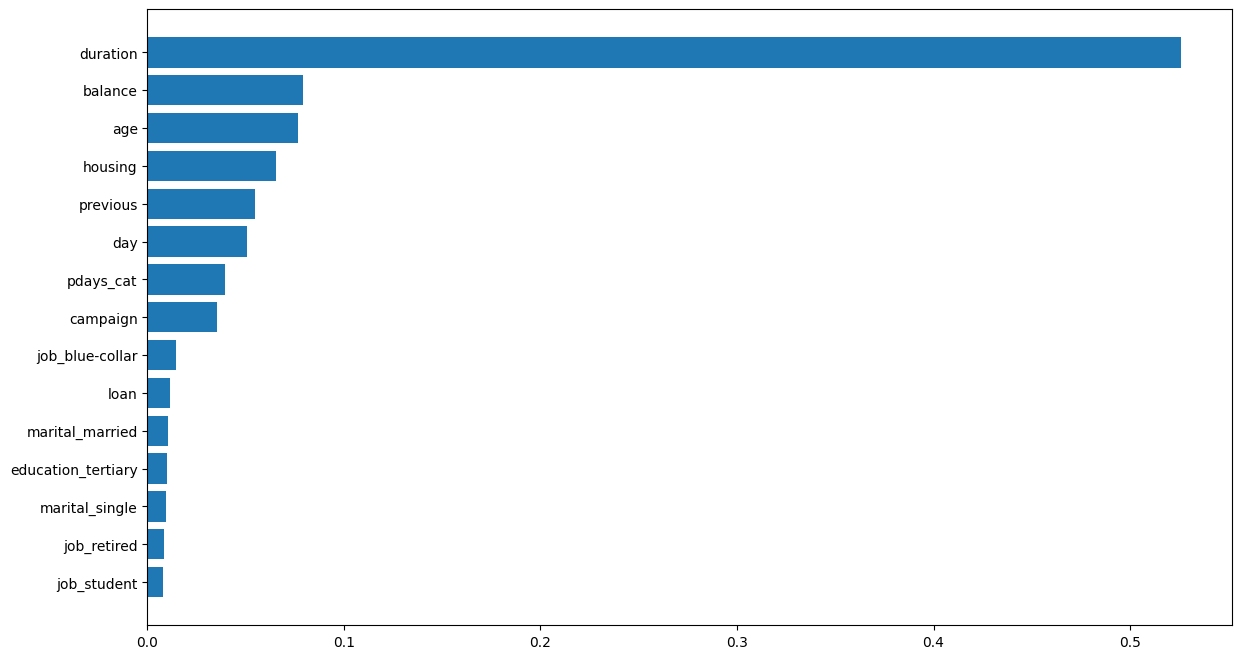

In [ ]:
feature_names = rf.feature_names_in_
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(14,8))
plt.barh(range(len(indices)),importances[indices],align='center')
plt.yticks(range(len(indices)),feature_names[indices])
plt.show()

## Feature Selection con SelectKBest

In [ ]:
kbest = SelectKBest(k=15,score_func=f_classif)
kbest.fit(X_train,y_train)

SelectKBest(k=15)

In [ ]:
kbest.feature_names_in_

array(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'previous', 'pdays_cat', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_telephone'], dtype=object)

In [ ]:
kbest.scores_

array([7.54746088e+00, 2.77931915e+00, 3.33455073e+01, 2.41402124e+02,
       5.24171939e+01, 1.29264082e+01, 1.23549749e+03, 8.59310208e+01,
       9.26929117e+01, 2.67364055e+02, 1.60970603e+00, 5.80478555e+01,
       9.99502242e+00, 1.27614949e+01, 8.07150460e+00, 6.78614464e+01,
       4.99148247e-01, 1.54315456e+01, 4.71693400e+01, 7.38002653e-01,
       4.43176556e+00, 1.81583789e+00, 4.79272264e+01, 4.16615330e+01,
       1.97661099e+01, 6.18435526e+00, 3.33151815e+01, 2.18436938e+00,
       2.18436938e+00])

In [ ]:
kbest_features = X_train.columns[kbest.get_support()]

In [ ]:
kbest_features

Index(['balance', 'housing', 'loan', 'duration', 'campaign', 'previous',
       'pdays_cat', 'job_blue-collar', 'job_retired', 'job_services',
       'job_student', 'marital_married', 'marital_single', 'education_primary',
       'education_tertiary'],
      dtype='object')

In [ ]:
rf = RandomForestClassifier(min_samples_split=30)
rf.fit(X_train[kbest_features],y_train)

RandomForestClassifier(min_samples_split=30)

In [ ]:
y_pred_train = rf.predict(X_train[kbest_features])
y_pred_test = rf.predict(X_test[kbest_features])
print(accuracy_score(y_pred_train,y_train))
print(accuracy_score(y_pred_test,y_test))

0.8499301536619437
0.8292098962490024


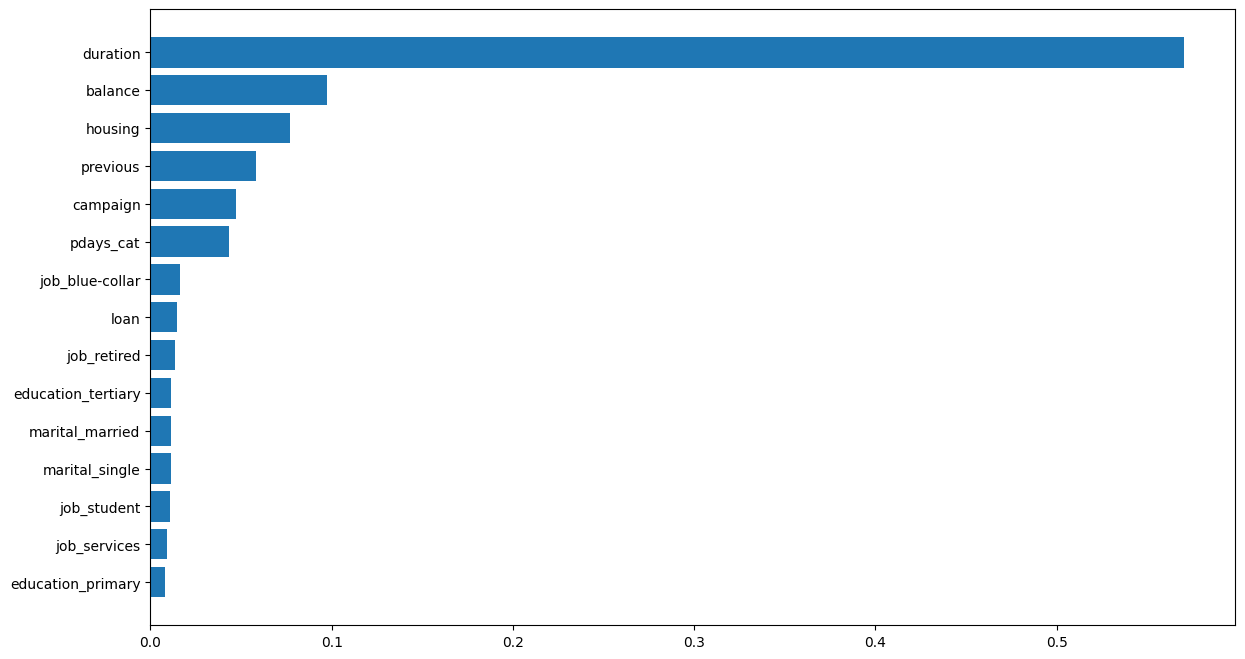

In [ ]:
feature_names = rf.feature_names_in_
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(14,8))
plt.barh(range(len(indices)),importances[indices],align='center')
plt.yticks(range(len(indices)),feature_names[indices])
plt.show()